<a href="https://colab.research.google.com/github/atc857/enem2023/blob/main/enem2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de microdados do Enem 2023

Autor: André T. Campos

Os microdados completos do Enem estão disponíveis em https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem. Neste notebook utilizarei uma base de dados reduzida (foram retiradas algumas colunas referentes especialmente a dados da escola e as linhas de candidatos ausentes nos dias de provas).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Base de dados reduzida do Enem 2023
link_base = 'https://media.githubusercontent.com/media/atc857/enem2023/refs/heads/main/enem2023.csv'
enem2023 = pd.read_csv(link_base, encoding='ISO-8859-1')

# Análise exploratória de dados

In [ ]:
enem2023.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210061103945,6,F,1,1,1,0,1,4305108,Caxias do Sul,...,B,A,A,B,A,A,A,A,A,B
1,210060214087,2,F,1,3,1,0,2,2304400,Fortaleza,...,A,A,A,B,A,A,D,A,A,B
2,210059980948,3,F,1,3,1,0,2,2311306,Quixadá,...,A,A,A,B,A,A,B,A,A,A
3,210060801601,11,M,1,1,1,8,1,3505906,Batatais,...,B,A,B,C,B,A,C,A,B,B
4,210059085130,8,M,1,3,1,5,1,2408102,Natal,...,B,A,B,B,A,A,E,A,B,B


In [ ]:
enem2023.tail()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2836801,210061965964,12,F,1,1,1,17,1,4314902,Porto Alegre,...,B,A,B,C,A,A,D,A,B,B
2836802,210061959674,3,M,1,1,1,0,2,4318705,São Leopoldo,...,B,A,B,D,B,A,E,A,C,B
2836803,210061959676,12,M,1,1,1,6,1,4303103,Cachoeirinha,...,B,A,A,C,A,B,E,A,A,B
2836804,210061950911,1,F,1,1,2,0,1,3550308,São Paulo,...,B,A,B,C,B,B,B,B,C,B
2836805,210061932304,2,M,1,1,1,0,3,3507605,Bragança Paulista,...,B,B,B,C,A,A,D,A,C,B


In [ ]:
enem2023.shape

(2836806, 43)

In [ ]:
enem2023.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025'],
      dtype='object')

In [ ]:
# Verificar a quantidade de valores únicos (nacionalidades) na coluna TP_NACIONALIDADE
enem2023.replace({'TP_NACIONALIDADE': {0: 'Não declarado', 1: 'Brasileiro', 2: 'Brasileiro naturalizado', 3: 'Estrangeiro', 4: 'Brasileiro nascido no exterior'}}, inplace=True)
enem2023['TP_NACIONALIDADE'].value_counts()

,count
TP_NACIONALIDADE,
Brasileiro,2772550
Brasileiro naturalizado,51132
Brasileiro nascido no exterior,6708
Estrangeiro,5042
Não declarado,1374


In [ ]:
# Usando o dicionário de dados, subsitutir os valores de raça e contar as entradas de cada categoria
enem2023.replace({'TP_COR_RACA': {0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5:'Indígena'}}, inplace=True)
enem2023['TP_COR_RACA'].value_counts()

,count
TP_COR_RACA,
Branca,1215705
Parda,1186276
Preta,338415
Amarela,45425
Não declarado,35310
Indígena,15675


In [ ]:
# Usando o dicionário de dados, substituir os valores de TP_ANO_CONCLUIU
enem2023.replace({'TP_ANO_CONCLUIU': {
    0: 'Não informado',
    1: '2022',
    2: '2021',
    3: '2020',
    4: '2019',
    5: '2018',
    6: '2017',
    7: '2016',
    8: '2015',
    9: '2014',
    10: '2013',
    11: '2012',
    12: '2011',
    13: '2010',
    14: '2009',
    15: '2008',
    16: '2007',
    17: 'Antes de 2007'
}}, inplace=True)

In [ ]:
# Usando o dicionário de dados, substituir os valores de TP_ESCOLA
enem2023.replace({'TP_ESCOLA': {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada'
}}, inplace=True)

In [ ]:
enem2023['TP_ESCOLA'].value_counts()

,count
TP_ESCOLA,
Não Respondeu,1732908
Pública,878746
Privada,225152


## Resumo da estatística descritiva do conjunto de dados

In [ ]:
enem2023[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].describe().apply(lambda x: x.apply('{0:.1f}'.format))

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,2692427.0,2822643.0,2822643.0,2692427.0,2822643.0
mean,495.8,523.4,518.1,533.8,617.8
std,87.9,88.6,75.5,131.6,214.6
min,0.0,0.0,0.0,0.0,0.0
25%,440.5,467.8,471.4,431.2,500.0
50%,493.9,530.4,523.1,523.6,620.0
75%,551.2,584.9,570.3,630.1,780.0
max,868.4,823.0,820.8,958.6,1000.0


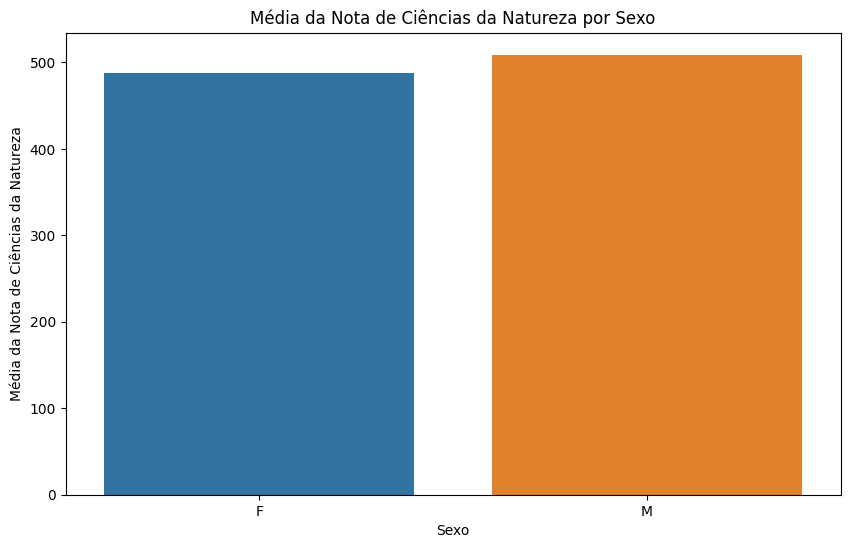

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TP_SEXO', y='NU_NOTA_CN', data=enem2023, hue='TP_SEXO', legend=False)
plt.title('Média da Nota de Ciências da Natureza por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Média da Nota de Ciências da Natureza')
plt.show()

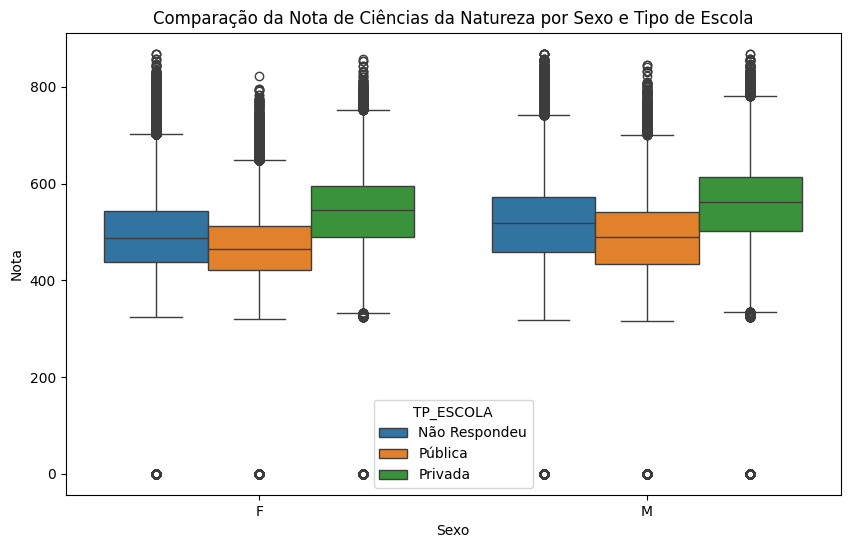

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TP_SEXO', y='NU_NOTA_CN', hue='TP_ESCOLA', data=enem2023)
plt.title('Comparação da Nota de Ciências da Natureza por Sexo e Tipo de Escola')
plt.xlabel('Sexo')
plt.ylabel('Nota')
plt.show()

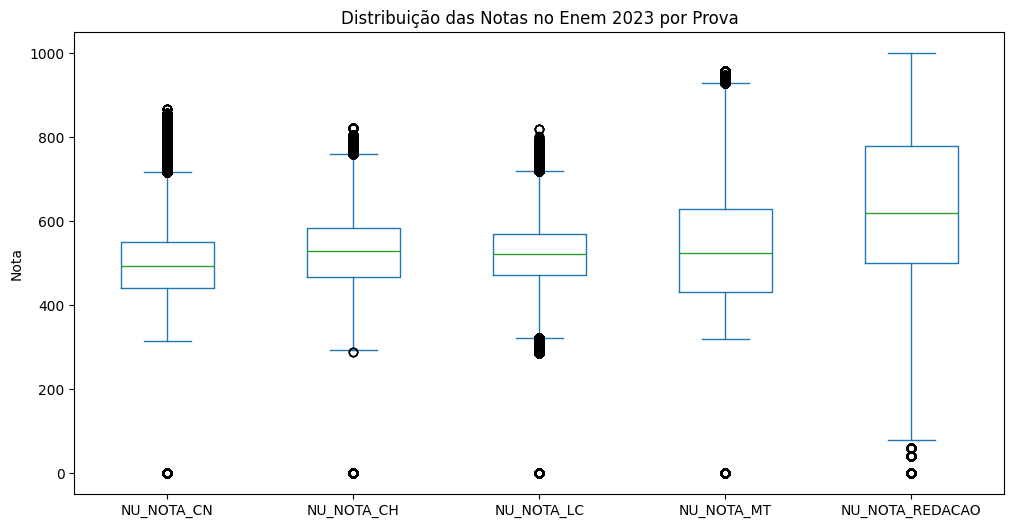

In [ ]:
enem2023[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].plot.box(figsize=(12, 6))
plt.title('Distribuição das Notas no Enem 2023 por Prova')
plt.ylabel('Nota')
plt.show()

In [ ]:
# Quantidade de candidatos por unidade da Federação
enem2023['SG_UF_PROVA'].value_counts()

,count
SG_UF_PROVA,
SP,435020
MG,263714
BA,231440
RJ,196845
CE,181893
PA,162460
PE,160009
PR,122527
MA,118868


In [ ]:
# Gerar subconjunto do dataframe apenas com as colunas 'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO' que corresponda às seguintes siglas da coluna SG_UF_PROVA: DF, GO, MT, MS.

centrooeste_enem = enem2023.loc[enem2023['SG_UF_PROVA'].isin(['DF', 'GO', 'MT', 'MS']), ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]

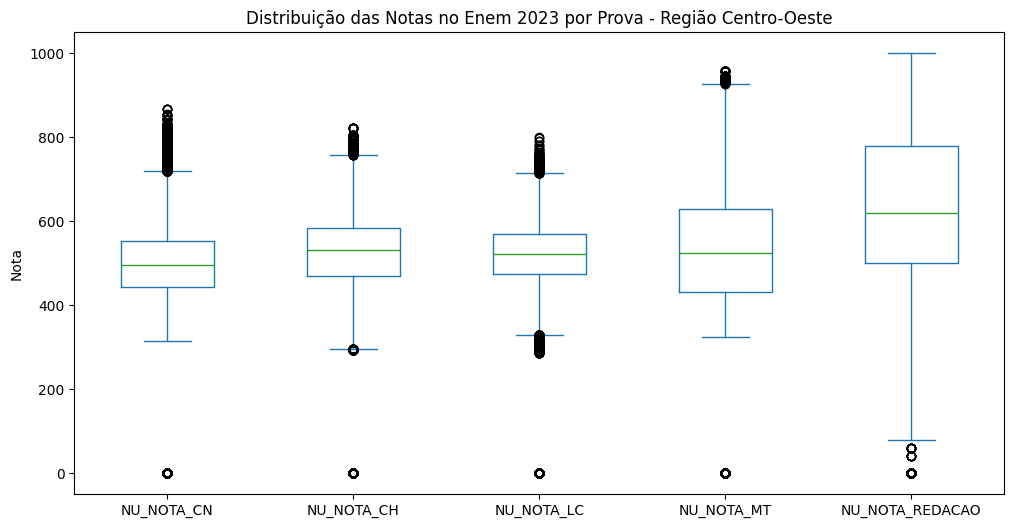

In [ ]:
centrooeste_enem[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].plot.box(figsize=(12, 6))
plt.title('Distribuição das Notas no Enem 2023 por Prova - Região Centro-Oeste')
plt.ylabel('Nota')
plt.show()

## Recortes para dados socioeconômicos

In [ ]:
# Dicionário para Q001 e Q002 (grau de instrução dos pais)
dic_grau_instrucao = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'}

In [ ]:
enem2023.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025'],
      dtype='object')

In [ ]:
# Filtrar as colunas 'NU_INSCRICAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','Q001,'Q002' do dataframe enem2023
enem2023_socio = enem2023.loc[:,['NU_INSCRICAO','TP_SEXO','TP_COR_RACA','CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002']]
enem2023_socio.head()

,NU_INSCRICAO,TP_SEXO,TP_COR_RACA,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,210061103945,F,Branca,4305108,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,H,E
1,210060214087,F,Parda,2304400,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,D,D
2,210059980948,F,Parda,2311306,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,B,B
3,210060801601,M,Branca,3505906,Batatais,SP,564.7,630.3,610.4,680.2,600.0,H,E
4,210059085130,M,Parda,2408102,Natal,RN,644.9,620.2,626.9,736.3,860.0,F,C


In [ ]:
# Inserir duas novas colunas em enem2023_socio com a descrição do dicionário dic_grau_instrucao a partir das colunas Q001 e Q002
enem2023_socio.loc[:,'Q001_DESC'] = enem2023_socio['Q001'].map(dic_grau_instrucao)
enem2023_socio.loc[:,'Q002_DESC'] = enem2023_socio['Q002'].map(dic_grau_instrucao)
enem2023_socio.head()

,NU_INSCRICAO,TP_SEXO,TP_COR_RACA,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q001_DESC,Q002_DESC
0,210061103945,F,Branca,4305108,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,H,E,Não sei,"Completou o Ensino Médio, mas não completou a ..."
1,210060214087,F,Parda,2304400,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
2,210059980948,F,Parda,2311306,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
3,210060801601,M,Branca,3505906,Batatais,SP,564.7,630.3,610.4,680.2,600.0,H,E,Não sei,"Completou o Ensino Médio, mas não completou a ..."
4,210059085130,M,Parda,2408102,Natal,RN,644.9,620.2,626.9,736.3,860.0,F,C,"Completou a Faculdade, mas não completou a Pós...","Completou a 4ª série/5º ano, mas não completou..."


In [ ]:
# Agrupar as notas das provas em enem2023_socio pela coluna de grau de instrução da mãe Q002_DESC
enem2023_socio.groupby('Q002_DESC')[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean().\
sort_values(by=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'], ascending=False)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q002_DESC,,,,,
Completou a Pós-graduação,537.067795,562.559587,552.387230,608.872288,710.485474
"Completou a Faculdade, mas não completou a Pós-graduação",528.516162,555.700612,546.705396,593.892732,690.546848
"Completou o Ensino Médio, mas não completou a Faculdade",493.504537,523.061706,519.366039,532.184255,621.073125
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",476.920406,506.063443,503.773246,502.395626,582.328564
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",473.314900,501.510627,498.072067,491.275936,566.383909
Não completou a 4ª série/5º ano do Ensino Fundamental,466.627675,493.483445,488.431206,472.437117,539.988710
Não sei,464.863941,486.845852,485.681227,483.024274,520.346428
Nunca estudou,455.508722,478.006808,471.437454,444.549741,488.166833


In [ ]:
# Agrupar as notas das provas em enem2023_socio pela coluna de grau de instrução do pai Q001_DESC
enem2023_socio.groupby('Q001_DESC')[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean().\
sort_values(by=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'], ascending=False)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q001_DESC,,,,,
Completou a Pós-graduação,550.665610,574.340686,562.024412,632.721516,732.040952
"Completou a Faculdade, mas não completou a Pós-graduação",539.772581,566.656535,555.826122,613.117482,709.339548
"Completou o Ensino Médio, mas não completou a Faculdade",500.739206,530.369268,525.738073,545.063556,636.838783
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",485.108846,513.785463,510.900447,517.755190,603.142394
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",480.056081,508.428336,505.107917,506.020772,588.545328
Não sei,474.389310,502.217441,500.968405,496.690296,559.592839
Não completou a 4ª série/5º ano do Ensino Fundamental,470.524419,497.598802,493.004084,483.038136,558.234584
Nunca estudou,457.774761,481.605769,475.899545,454.947711,512.772158


## Correlação com dados de IDHM

O IDHM é um indicador que mede o desenvolvimento humano de um município com base em três dimensões: longevidade, educação e renda. O valor do IDHM varia de 0 a 1, sendo que quanto mais próximo de 1, maior o desenvolvimento humano.

A base de dados utilizada neste notebook está disponível em https://basedosdados.org/.

In [ ]:
link_idhm = 'https://media.githubusercontent.com/media/atc857/enem2023/refs/heads/main/mundo_onu_adh_municipio.csv'
idhm = pd.read_csv(link_idhm, encoding='ISO-8859-1')

In [ ]:
idhm.head()

,ano,id_municipio,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,1991,1100015,62.01,4.08,45.58,58.05,73.50,83.81,66.87,1.82,...,NaN,NaN,NaN,NaN,0.117,0.109,0.329,0.112,0.617,0.516
1,1991,1100023,66.02,3.72,32.39,41.41,69.97,88.08,74.23,1.82,...,NaN,NaN,NaN,NaN,0.200,0.199,0.432,0.199,0.684,0.593
2,1991,1100031,63.16,3.89,41.52,52.94,77.23,85.09,69.00,2.59,...,NaN,NaN,NaN,NaN,0.111,0.106,0.309,0.108,0.636,0.430
3,1991,1100049,65.03,3.81,35.37,45.19,71.11,87.08,72.44,2.47,...,NaN,NaN,NaN,NaN,0.176,0.169,0.407,0.171,0.667,0.593
4,1991,1100056,62.73,3.55,43.00,54.82,71.09,84.62,68.20,2.46,...,NaN,NaN,NaN,NaN,0.152,0.175,0.386,0.167,0.629,0.547


In [ ]:
idhm.tail()

,ano,id_municipio,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
16690,2010,5222005,74.10,2.10,14.40,17.04,45.11,93.03,82.02,7.17,...,10754.0,1129.0,711.0,8914.0,0.432,0.747,0.712,0.622,0.818,0.710
16691,2010,5222054,73.25,2.29,15.70,18.51,42.38,92.47,80.75,5.49,...,6192.0,622.0,380.0,5190.0,0.389,0.676,0.684,0.562,0.804,0.707
16692,2010,5222203,74.07,2.64,14.50,17.09,50.80,93.02,81.98,4.05,...,3807.0,475.0,268.0,3065.0,0.431,0.594,0.647,0.534,0.818,0.619
16693,2010,5222302,73.09,2.67,15.90,18.80,50.75,92.36,80.50,7.06,...,4298.0,508.0,314.0,3476.0,0.330,0.624,0.634,0.505,0.802,0.629
16694,2010,5300108,77.35,1.75,14.01,15.85,40.14,94.57,86.19,4.97,...,2180903.0,219091.0,130872.0,1830940.0,0.723,0.751,0.824,0.742,0.873,0.863


In [ ]:
idhm.columns

Index(['ano', 'id_municipio', 'expectativa_vida', 'fecundidade_total',
       'mortalidade_1', 'mortalidade_5', 'razao_dependencia',
       'prob_sobrevivencia_40', 'prob_sobrevivencia_60', 'taxa_envelhecimento',
       ...
       'pia', 'pia_10_14', 'pia_15_17', 'pia_18_mais', 'indice_escolaridade',
       'indice_frequencia_escolar', 'idhm', 'idhm_e', 'idhm_l', 'idhm_r'],
      dtype='object', length=230)

In [ ]:
# Reter apenas as colunas de interesse dos dados de idhm do ano de 2010 para fazer um merge com dataframe do enem
idhm_mun = idhm.loc[idhm['ano'] == 2010, ['id_municipio', 'indice_frequencia_escolar', 'idhm', 'idhm_e', 'idhm_l', 'idhm_r']]
idhm_mun.head()

,id_municipio,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
11130,1100015,0.629,0.641,0.526,0.763,0.657
11131,1100023,0.648,0.702,0.600,0.806,0.716
11132,1100031,0.700,0.650,0.559,0.757,0.650
11133,1100049,0.698,0.718,0.620,0.821,0.727
11134,1100056,0.712,0.692,0.602,0.799,0.688


In [ ]:
idhm_mun.shape

(5565, 6)

In [ ]:
enem2023_socio.columns

Index(['NU_INSCRICAO', 'TP_SEXO', 'TP_COR_RACA', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q001_DESC', 'Q002_DESC'],
      dtype='object')

In [ ]:
# Agrupar os dados de notas nas provas do enem 2023 por município
enem2023_mun = enem2023_socio.groupby(['CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA'], as_index=False)[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean()
enem2023_mun.head()

,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,483.602024,504.727376,496.107605,519.156275,633.688213
1,1100023,Ariquemes,482.007005,504.965010,501.966284,506.358379,600.012747
2,1100049,Cacoal,482.822705,513.545915,507.177639,517.629529,597.233154
3,1100056,Cerejeiras,476.213853,503.886752,501.394017,495.251515,612.393162
4,1100064,Colorado do Oeste,481.834050,503.811268,498.479225,501.062366,592.887324


In [ ]:
# Combinar os dois dataframes (enem2023_socio e idhm_mun)
enem2023_idhm = pd.merge(enem2023_mun, idhm_mun, left_on='CO_MUNICIPIO_PROVA', right_on='id_municipio', how='left')

In [ ]:
enem2023_idhm.head()

,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,id_municipio,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,1100015,Alta Floresta D'Oeste,483.602024,504.727376,496.107605,519.156275,633.688213,1100015,0.629,0.641,0.526,0.763,0.657
1,1100023,Ariquemes,482.007005,504.965010,501.966284,506.358379,600.012747,1100023,0.648,0.702,0.600,0.806,0.716
2,1100049,Cacoal,482.822705,513.545915,507.177639,517.629529,597.233154,1100049,0.698,0.718,0.620,0.821,0.727
3,1100056,Cerejeiras,476.213853,503.886752,501.394017,495.251515,612.393162,1100056,0.712,0.692,0.602,0.799,0.688
4,1100064,Colorado do Oeste,481.834050,503.811268,498.479225,501.062366,592.887324,1100064,0.683,0.685,0.584,0.814,0.676


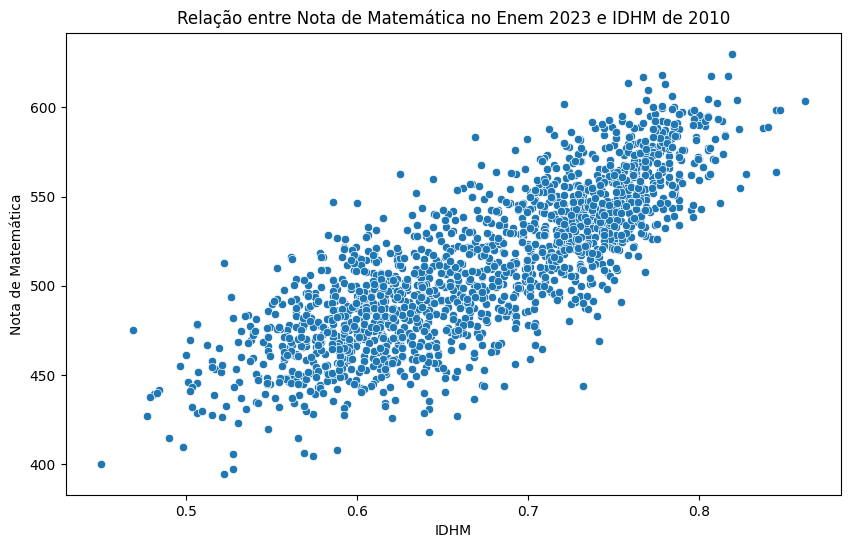

In [ ]:
# Gráfico de dispersão da nota de matemática (NU_NOTA_MT) com o idhm do munício da prova
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idhm', y='NU_NOTA_MT', data=enem2023_idhm)
plt.title('Relação entre Nota de Matemática no Enem 2023 e IDHM de 2010')
plt.xlabel('IDHM')
plt.ylabel('Nota de Matemática')
plt.show()

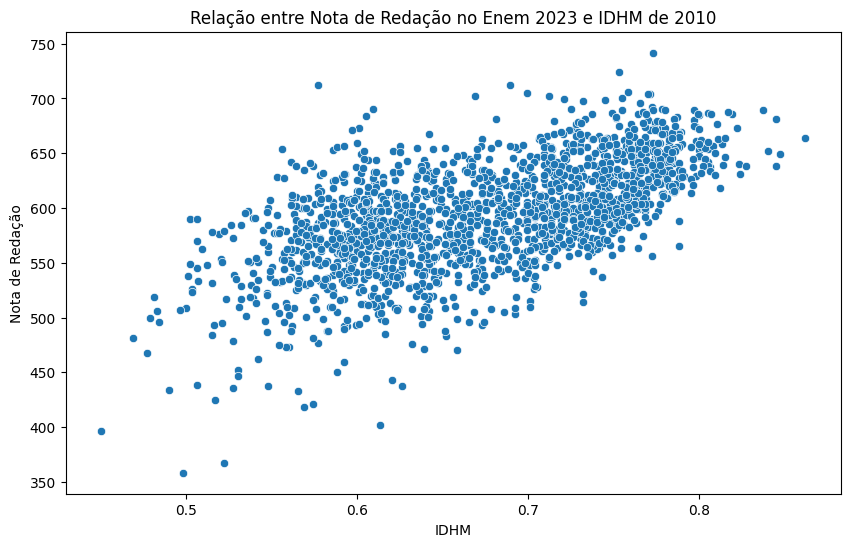

In [ ]:
# Gráfico de dispersão da nota de redação com o idhm do munício da prova
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idhm', y='NU_NOTA_REDACAO', data=enem2023_idhm)
plt.title('Relação entre Nota de Redação no Enem 2023 e IDHM de 2010')
plt.xlabel('IDHM')
plt.ylabel('Nota de Redação')
plt.show()

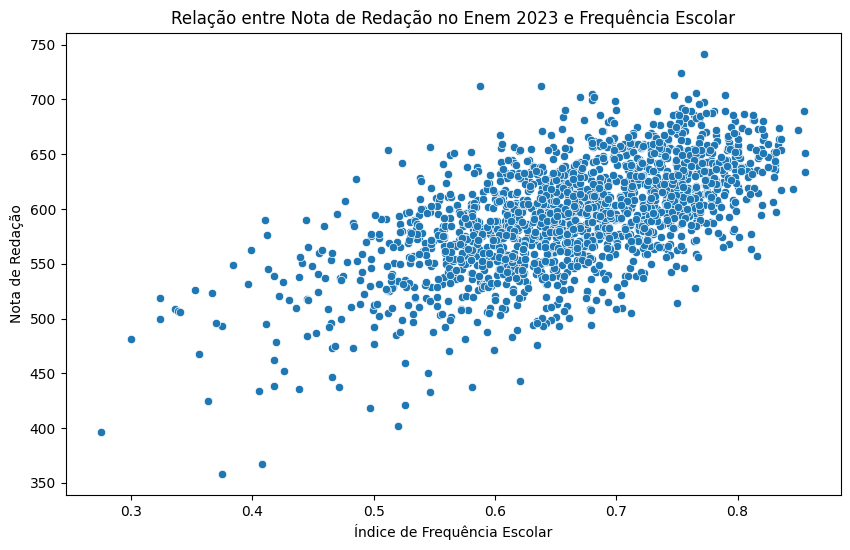

In [ ]:
# Gráfico de dispersão da nota de redação com o indice de frequência escolar do munício da prova
plt.figure(figsize=(10, 6))
sns.scatterplot(x='indice_frequencia_escolar', y='NU_NOTA_REDACAO', data=enem2023_idhm)
plt.title('Relação entre Nota de Redação no Enem 2023 e Frequência Escolar')
plt.xlabel('Índice de Frequência Escolar')
plt.ylabel('Nota de Redação')
plt.show()

# Teste de hipóteses

Aplicaremos 3 testes: o teste T, teste Qui-quadrado e Anova aos dados do enem 2023.

Utilizaremos o pacote estatístico Pingouin, que foi desenvolvido para usuários que desejam funções de estatísticas simples, mas exaustivas. A documentação do pacote pode ser consultada em https://pingouin-stats.org/build/html/index.html.

In [ ]:
# Instalação do pacote
!pip install pingouin -q

In [ ]:
# Importação da biblioteca
import pingouin as pg

## Teste t para duas amostras independentes

Ex. 1) Verificar se existe diferença significativa na média da nota de redação entre candidatos homens e mulheres no enem 2023.

In [ ]:
# Mostrar a média das notas de redação agrupadas por sexo
enem2023.groupby('TP_SEXO')['NU_NOTA_REDACAO'].mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,634.928600
M,590.500667


In [ ]:
# Aplicação do teste t para duas amostras independentes
red_homens = enem2023.loc[enem2023['TP_SEXO'] == 'F', 'NU_NOTA_REDACAO']
red_mulheres = enem2023.loc[enem2023['TP_SEXO'] == 'M', 'NU_NOTA_REDACAO']
pg.ttest(red_homens, red_mulheres)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,169.169862,2.268097e+06,two-sided,0.0,"[43.91, 44.94]",0.208065,inf,1.0


**Interpretação do resultado**

Se o valor-p for muito baixo (inferior ao nível de significância $ p \leq \alpha = 0.05 $), então podemos rejeitar a hipótese nula e assumir que há diferença significativa entre as médias dos dois grupos.

## Teste qui-quadrado

Ex. 2) Verificar se existe asociação entre cor/raça do candidato e o grau de instrução dos pais no enem 2023.

In [ ]:
# Primeiramente vamos criar a tabela de contigência a partir das colunas com os dados de interesse no dataframe
tab_contingencia = pd.crosstab(enem2023_socio['Q001_DESC'], enem2023_socio['TP_COR_RACA'])
tab_contingencia.sort_values(by='Preta', ascending=False)

TP_COR_RACA,Amarela,Branca,Indígena,Não declarado,Parda,Preta
Q001_DESC,,,,,,
"Completou o Ensino Médio, mas não completou a Faculdade",12238,393478,3969,9211,339363,94420
Não completou a 4ª série/5º ano do Ensino Fundamental,7587,125251,3427,5245,228108,68266
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",5195,128702,2192,3991,165171,47459
Não sei,4488,89104,1734,5942,125989,41400
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",5024,126458,1721,3506,139890,39418
Nunca estudou,2015,22194,1258,1422,57421,19360
"Completou a Faculdade, mas não completou a Pós-graduação",5217,177286,833,3343,77393,17337
Completou a Pós-graduação,3661,153232,541,2650,52941,10755


In [ ]:
expected, observed, stats = pg.chi2_independence(data=enem2023_socio, x='Q001_DESC', y='TP_COR_RACA')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,192053.976438,35.0,0.0,0.116362,1.0
1,cressie-read,0.666667,192569.171586,35.0,0.0,0.116518,1.0
2,log-likelihood,0.000000,195926.527368,35.0,0.0,0.117529,1.0
3,freeman-tukey,-0.500000,200651.781402,35.0,0.0,0.118938,1.0
4,mod-log-likelihood,-1.000000,207512.249488,35.0,0.0,0.120955,1.0
5,neyman,-2.000000,229016.077247,35.0,0.0,0.127067,1.0


**Interpretação do resultado**

Se o valor-p for muito baixo (inferior ao nível de significância $ p \leq \alpha = 0.05 $), então podemos rejeitar a hipótese nula e assumir que há associação significativa entre as características analisadas.

In [ ]:
expected

TP_COR_RACA,Amarela,Branca,Indígena,Não declarado,Parda,Preta
Q001_DESC,,,,,,
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",5647.848936,151152.849560,1948.927509,4390.215651,147493.839184,42076.319160
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",5060.293945,135428.170620,1746.177382,3933.494314,132149.813097,37699.050642
"Completou a Faculdade, mas não completou a Pós-graduação",4506.125489,120597.012395,1554.948091,3502.725174,117677.677953,33570.510897
Completou a Pós-graduação,3583.328046,95900.271256,1236.514411,2785.411410,93578.779543,26695.695335
"Completou o Ensino Médio, mas não completou a Faculdade",13653.716037,365413.117321,4711.546480,10613.378388,356567.433023,101719.808751
Nunca estudou,1660.039407,44427.478421,572.836934,1290.390566,43352.006771,12367.247901
Não completou a 4ª série/5º ano do Ensino Fundamental,7011.716945,187653.920719,2419.563305,5450.384707,183111.316031,52237.098293
Não sei,4301.931195,115132.179707,1484.485888,3343.999791,112345.134398,32049.269021


In [ ]:
expected2, observed2, stats2 = pg.chi2_independence(data=enem2023_socio, x='Q002_DESC', y='TP_COR_RACA')
stats2

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,165314.235217,35.0,0.0,0.107958,1.0
1,cressie-read,0.666667,165202.952128,35.0,0.0,0.107922,1.0
2,log-likelihood,0.000000,166613.267840,35.0,0.0,0.108381,1.0
3,freeman-tukey,-0.500000,169108.147878,35.0,0.0,0.109190,1.0
4,mod-log-likelihood,-1.000000,172892.740259,35.0,0.0,0.110405,1.0
5,neyman,-2.000000,184778.198896,35.0,0.0,0.114137,1.0


## Análise de variância - Anova

Ex. 3) Verificar se existe diferença significativa na média da nota de redação de acordo com o grau de instrução dos pais dos candidatos no enem 2023.

In [ ]:
pg.anova(data=enem2023_socio, dv='NU_NOTA_REDACAO', between='Q001_DESC', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Q001_DESC,9.511929e+09,7,1.358847e+09,31828.746791,0.0,0.073159
1,Within,1.205052e+11,2822635,4.269244e+04,NaN,NaN,NaN


In [ ]:
# Pós-teste de Tukey
pg.pairwise_tukey(data=enem2023_socio, dv='NU_NOTA_REDACAO', between='Q001_DESC')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...,588.545328,603.142394,-14.597066,0.507322,-28.772795,1.110223e-16,-0.068970
1,"Completou a 4ª série/5º ano, mas não completou...","Completou a Faculdade, mas não completou a Pós...",588.545328,709.339548,-120.794220,0.523573,-230.711441,1.110223e-16,-0.595988
2,"Completou a 4ª série/5º ano, mas não completou...",Completou a Pós-graduação,588.545328,732.040952,-143.495625,0.560006,-256.239246,1.110223e-16,-0.708920
3,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ...",588.545328,636.838783,-48.293455,0.414664,-116.464184,1.110223e-16,-0.232570
4,"Completou a 4ª série/5º ano, mas não completou...",Nunca estudou,588.545328,512.772158,75.773170,0.732188,103.488662,1.110223e-16,0.356218
5,"Completou a 4ª série/5º ano, mas não completou...",Não completou a 4ª série/5º ano do Ensino Fund...,588.545328,558.234584,30.310744,0.468641,64.677931,1.110223e-16,0.144119
6,"Completou a 4ª série/5º ano, mas não completou...",Não sei,588.545328,559.592839,28.952489,0.530516,54.574246,1.110223e-16,0.134988
7,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou a Faculdade, mas não completou a Pós...",603.142394,709.339548,-106.197154,0.536846,-197.816695,1.110223e-16,-0.525059
8,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a Pós-graduação,603.142394,732.040952,-128.898558,0.572436,-225.175586,1.110223e-16,-0.638336
9,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...",603.142394,636.838783,-33.696389,0.431302,-78.127140,1.110223e-16,-0.162318


# Regressão Linear

Ex. 4) Verificar em que medida o IDHm explica a média da nota de redação dos candidatos do enem 2023.